# Import Libraries & Datasets

In [1]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np

nobel = pd.read_csv("nobel.csv")
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [2]:
nobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city            964 non-null    object
 10  birth_country         969 non-null    object
 11  sex                   970 non-null    object
 12  organization_name     736 non-null    object
 13  organization_city     735 non-null    object
 14  organization_country  735 non-null    object
 15  death_date            596 non-null    o

# What is the most commonly awarded gender and birth country?

In [3]:
# Check the number of gender and birth country and display it
num_gender = nobel['sex'].value_counts()
num_country = nobel['birth_country'].value_counts()

display(num_gender)
display(num_country)

sex
Male      905
Female     65
Name: count, dtype: int64

birth_country
United States of America                        291
United Kingdom                                   91
Germany                                          67
France                                           58
Sweden                                           30
                                               ... 
Austria-Hungary (Ukraine)                         1
Ottoman Empire (Turkey)                           1
Russian Empire (Azerbaijan)                       1
Bosnia (Bosnia and Herzegovina)                   1
French protectorate of Tunisia (now Tunisia)      1
Name: count, Length: 129, dtype: int64

In [4]:
# Find the most common gender and birth country
top_gender = num_gender.index[0]
top_country = num_country.index[0]

print(top_gender)
print(top_country)

Male
United States of America


# Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

In [13]:
# Create the US-born winners column
nobel['us_born_winners'] = nobel['birth_country'] == "United States of America"

# Create the decade column
nobel['decade'] = np.floor(nobel['year'] / 10) * 10
nobel['decade'] = nobel['decade'].astype('int')

# Group by decade and calculate the total and US-born laureates per decade
decade_data = nobel.groupby('decade').agg(
    total_winners=('year', 'count'),
    us_born_winners=('us_born_winners', 'sum')
).reset_index()

decade_data.head(10)

,decade,total_winners,us_born_winners
0,1900,57,1
1,1910,40,3
2,1920,54,4
3,1930,56,14
4,1940,43,13
5,1950,72,21
6,1960,79,21
7,1970,104,33
8,1980,97,31
9,1990,104,42


In [15]:
# Calculate the ratio of US-born winners
decade_data['us_born_ratio'] = decade_data['us_born_winners'] / decade_data['total_winners']

# Find the decade with the highest US-born winner ratio
max_decade_usa = decade_data[decade_data['us_born_ratio'] == decade_data['us_born_ratio'].max()]['decade'].values[0]

print(max_decade_usa)

2000


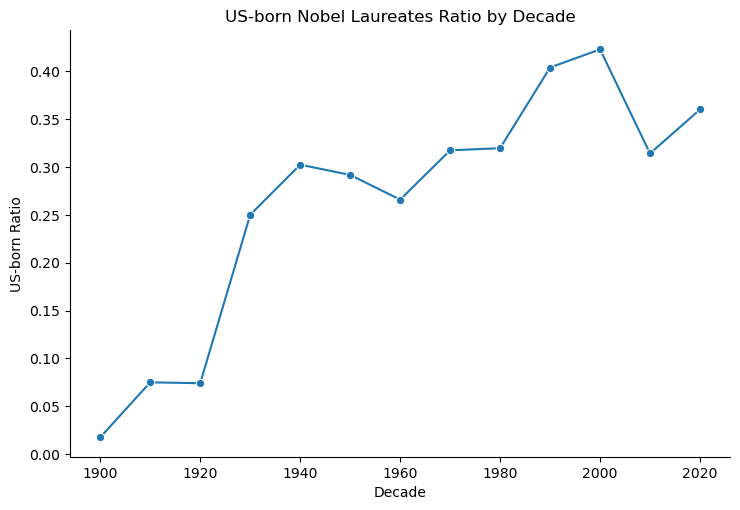

In [18]:
import matplotlib.pyplot as plt

# Create a relational line plot
sns.relplot(
    x='decade', 
    y='us_born_ratio', 
    kind='line', 
    data=decade_data, 
    marker='o', 
    aspect=1.5
)

# Add title and labels
plt.title('US-born Nobel Laureates Ratio by Decade')
plt.xlabel('Decade')
plt.ylabel('US-born Ratio')

# Show the plot
plt.show()

# Which decade and Nobel Prize category combination had the highest proportion of female laureates?

In [8]:
# Create a column indicating whether the laureate is female
nobel['is_female'] = nobel['sex'] == 'Female'

# Group by decade and category, calculate total laureates and female laureates
grouped_data = nobel.groupby(['decade', 'category']).agg(
    total_winners=('year', 'count'),
    female_winners=('is_female', 'sum')
).reset_index()

# Calculate the proportion of female laureates
grouped_data['female_ratio'] = grouped_data['female_winners'] / grouped_data['total_winners']

# Find the row with the highest female ratio
max_row = grouped_data.loc[grouped_data['female_ratio'].idxmax()]

# Extract the decade and category and store in a dictionary
max_female_dict = {int(max_row['decade']): max_row['category']}

print(max_female_dict)

{2020: 'Literature'}


# Who was the first woman to receive a Nobel Prize, and in what category?

In [9]:
# Filter for female laureates
female_laureates = nobel[nobel['sex'] == 'Female']

# Sort by year to find the earliest laureate
first_female_laureate = female_laureates.sort_values('year').iloc[0]

# Extract the name and category
first_woman_name = first_female_laureate['full_name']
first_woman_category = first_female_laureate['category']

print(first_woman_name)
print(first_woman_category)

Marie Curie, née Sklodowska
Physics


# Which individuals or organizations have won more than one Nobel Prize throughout the years?

In [10]:
# Group by name (or organization_name) and count the number of awards per individual or organization
repeat_winners = nobel.groupby('full_name').size()

# Filter for individuals or organizations that have won more than one Nobel Prize
repeat_list = repeat_winners[repeat_winners > 1].index.tolist()

print(repeat_list)

['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Frederick Sanger', 'John Bardeen', 'Linus Carl Pauling', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']


# 